In [72]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [73]:
dataset_name = "southern_oscillations"

In [74]:
input_fname = "southern_oscillations_dataset.txt"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [75]:
# data = pd.read_csv(input_fname, sep='\t')
data = pd.read_fwf(input_fname)

In [76]:
data.head()

,SouthernOsc,Year&Month,Year,Month
0,-0.7,1955.04,1955,1
1,1.3,1955.13,1955,2
2,0.1,1955.21,1955,3
3,-0.9,1955.29,1955,4
4,0.8,1955.38,1955,5


In [77]:
series_col = "SeriesId"
epoch_col = 'Epoch'
time_col = 'YearMonth'
value_col = 'SouthernOsc'

# Prepare Data

## Add Series Id

In [78]:
if series_col not in data:
    data.insert(0, "SeriesId", 1)

## Prepare Time Col

In [79]:
# Create a new column 'YearMonth' by combining the 'Year' and 'Month' columns and setting day as the first of the month
data[time_col] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

## Add Epochs

In [80]:
unique_times = sorted(data[time_col].drop_duplicates().tolist())
times_to_epoch = {
    t: i for i, t in enumerate(unique_times)
}
#print(yrmt_to_epoch)
data[epoch_col] = data[time_col].map(times_to_epoch)

# Reorder columns

In [81]:
data = data[[series_col, epoch_col, value_col]]

In [82]:
data.head()

,SeriesId,Epoch,SouthernOsc
0,1,0,-0.7
1,1,1,1.3
2,1,2,0.1
3,1,3,-0.9
4,1,4,0.8


# Visualize Data

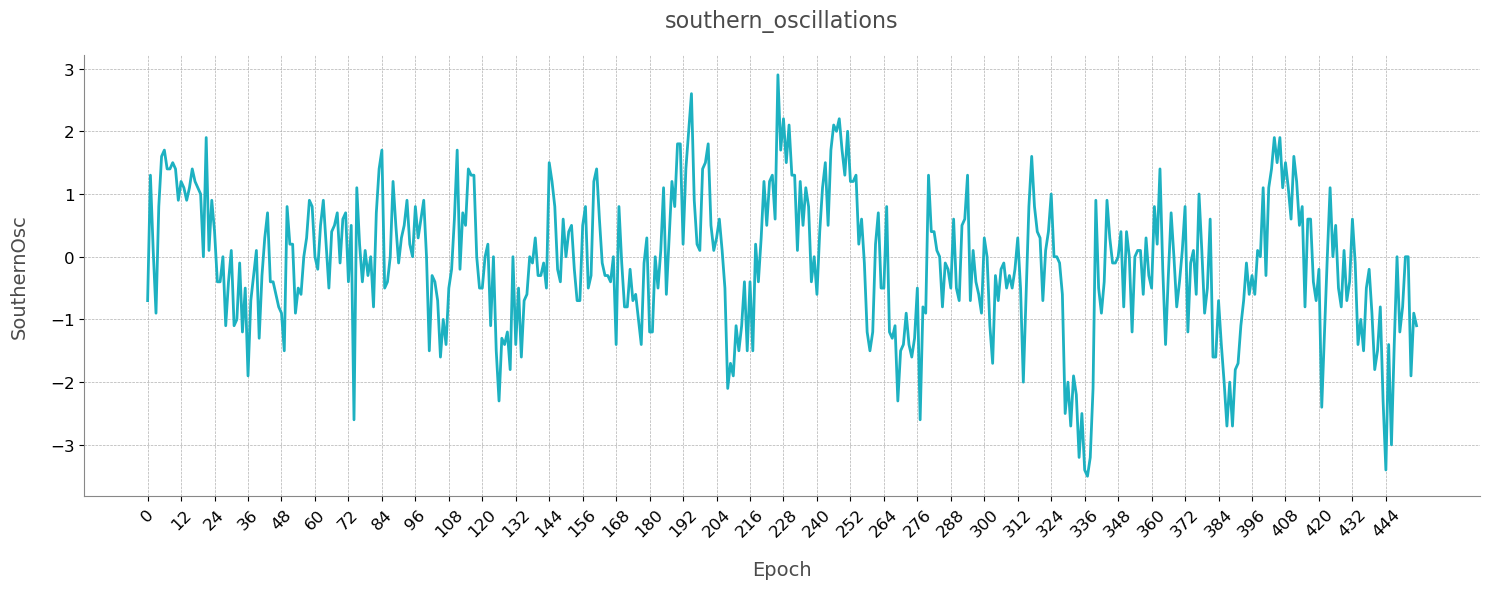

In [87]:
# Adjusting the spacing between axis titles and tick labels
plt.figure(figsize=(15, 6))

# Set title and labels with a medium contrast
font = {
#     'family': 'serif',
    'color':  '#4B4B4B',
    'weight': 'normal'
}

# Plotting the data
plt.plot(data[epoch_col], data[value_col], color='#1db1c1', linewidth=2)

# Adjusting the title and labels with increased spacing
plt.xlabel(epoch_col, fontsize=14, fontdict=font, labelpad=15)
plt.ylabel(value_col, fontsize=14, fontdict=font, labelpad=15)
plt.title(dataset_name, fontsize=16, fontdict=font, pad=20)

# Adjusting x and y ticks
plt.xticks(data[epoch_col][::12], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid and spines adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='#B0B0B0')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

plt.tight_layout()
plt.savefig(outp_fig_fname)
plt.show()

# Save Main Data File

In [83]:
data.to_csv(outp_fname, index=False)